# Results Comparison – Object Detection

This section presents a comparative evaluation of all object detection models trained in this project.  
Both **quantitative metrics** and **qualitative visualisations** are used to assess detection accuracy, generalisation behaviour, and inference efficiency.

The evaluated models are:
- Faster R-CNN
- YOLOv8s
- YOLOv11n
- YOLOv12n

## Quantitative Performance Summary

The table below summarises the evaluation metrics obtained on the test set for each object detection model.
Metrics include precision, recall, F1-score, mean Average Precision at IoU 0.5 (mAP@50),
mean Average Precision across IoU thresholds 0.5–0.95 (mAP@50–95),
and average inference time per image.

In [1]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Faster R-CNN", "YOLOv8s", "YOLOv11n", "YOLOv12n"],
    "Precision": [0.826, 0.871, 0.906, 0.939],
    "Recall": [0.811, 0.843, 0.774, 0.779],
    "F1-score": [0.818, 0.857, 0.836, 0.851],
    "mAP@50": [0.885, 0.899, 0.870, 0.873],
    "mAP@50–95": [0.772, 0.854, 0.729, 0.788],
    "Inference (ms)": [30.5, 5.49, 9.17, 7.33]
})

results

,Model,Precision,Recall,F1-score,mAP@50,mAP@50–95,Inference (ms)
0,Faster R-CNN,0.826,0.811,0.818,0.885,0.772,30.50
1,YOLOv8s,0.871,0.843,0.857,0.899,0.854,5.49
2,YOLOv11n,0.906,0.774,0.836,0.870,0.729,9.17
3,YOLOv12n,0.939,0.779,0.851,0.873,0.788,7.33


### Metric Interpretation

- **YOLOv12n** achieves the highest precision, indicating strong confidence in its detections.
- **YOLOv8s** provides the best balance between precision and recall, resulting in the highest F1-score.
- **Faster R-CNN** shows competitive accuracy but has significantly higher inference time.
- **YOLO-based models** outperform Faster R-CNN in inference speed, making them more suitable for real-time deployment.


## Graphs

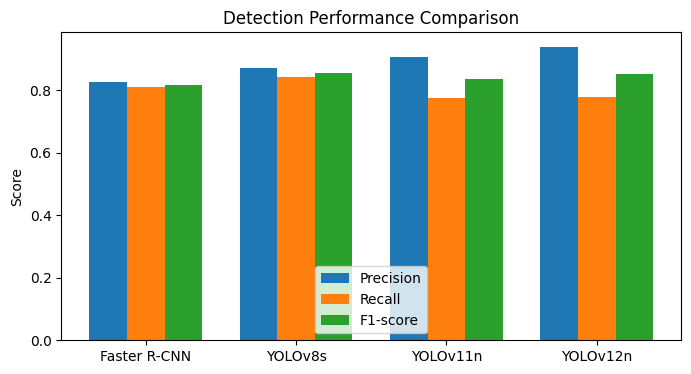

In [2]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ["Precision", "Recall", "F1-score"]
models = results["Model"]

x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(8, 4))
plt.bar(x - width, results["Precision"], width, label="Precision")
plt.bar(x, results["Recall"], width, label="Recall")
plt.bar(x + width, results["F1-score"], width, label="F1-score")

plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Detection Performance Comparison")
plt.legend()
plt.show()

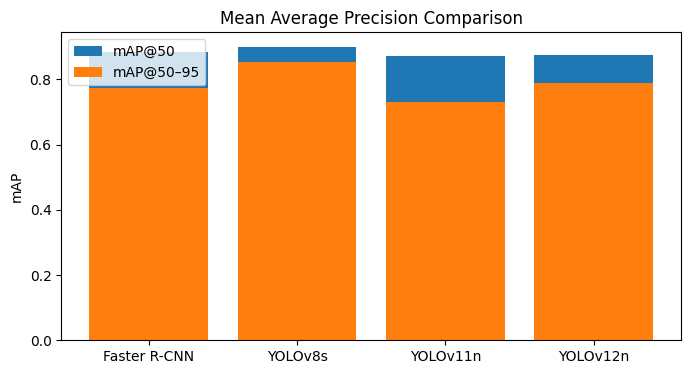

In [3]:
plt.figure(figsize=(8, 4))
plt.bar(models, results["mAP@50"], label="mAP@50")
plt.bar(models, results["mAP@50–95"], bottom=results["mAP@50–95"]*0, label="mAP@50–95")

plt.ylabel("mAP")
plt.title("Mean Average Precision Comparison")
plt.legend()
plt.show()

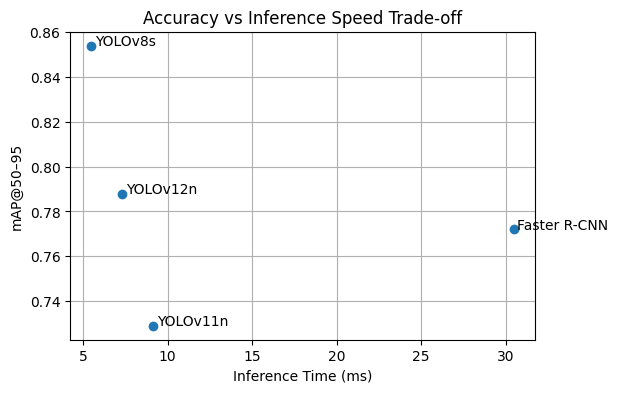

In [4]:
plt.figure(figsize=(6, 4))

plt.scatter(results["Inference (ms)"], results["mAP@50–95"])

for i, model in enumerate(models):
    plt.text(
        results["Inference (ms)"][i] + 0.2,
        results["mAP@50–95"][i],
        model
    )

plt.xlabel("Inference Time (ms)")
plt.ylabel("mAP@50–95")
plt.title("Accuracy vs Inference Speed Trade-off")
plt.grid(True)
plt.show()

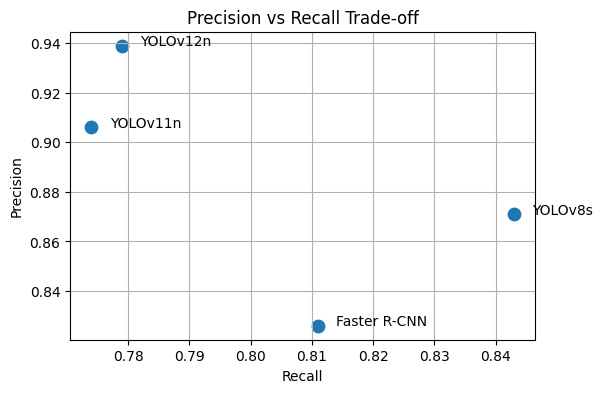

In [6]:
plt.figure(figsize=(6, 4))

plt.scatter(results["Recall"], results["Precision"], s=80)

for i, model in enumerate(results["Model"]):
    plt.text(
        results["Recall"][i] + 0.003,
        results["Precision"][i],
        model
    )

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision vs Recall Trade-off")
plt.grid(True)
plt.show()

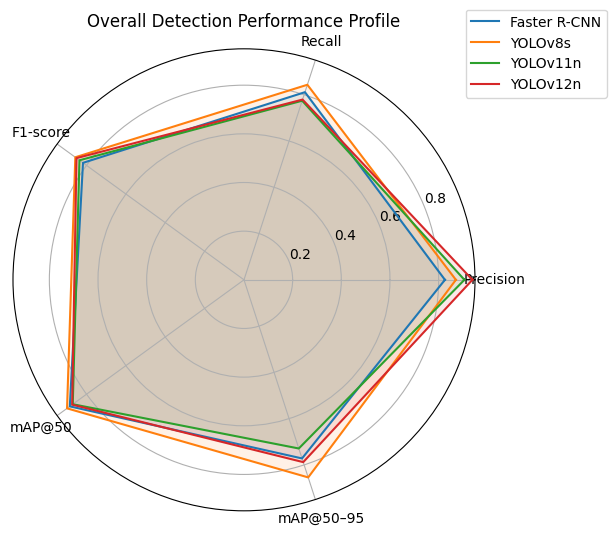

In [5]:
import numpy as np
import matplotlib.pyplot as plt

metrics = ["Precision", "Recall", "F1-score", "mAP@50", "mAP@50–95"]
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)

for _, row in results.iterrows():
    values = row[metrics].tolist()
    values += values[:1]
    ax.plot(angles, values, label=row["Model"])
    ax.fill(angles, values, alpha=0.1)

ax.set_thetagrids(np.degrees(angles[:-1]), metrics)
ax.set_title("Overall Detection Performance Profile")
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.show()

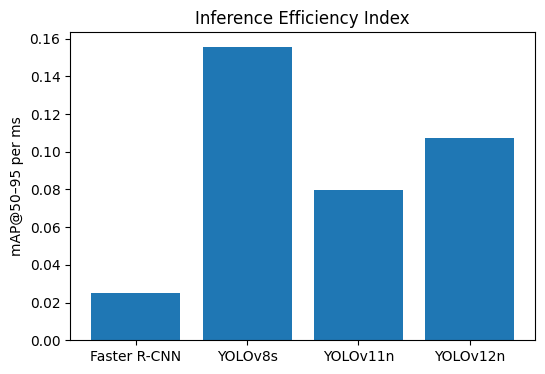

In [7]:
results["Efficiency"] = results["mAP@50–95"] / results["Inference (ms)"]

plt.figure(figsize=(6, 4))
plt.bar(results["Model"], results["Efficiency"])
plt.ylabel("mAP@50–95 per ms")
plt.title("Inference Efficiency Index")
plt.show()

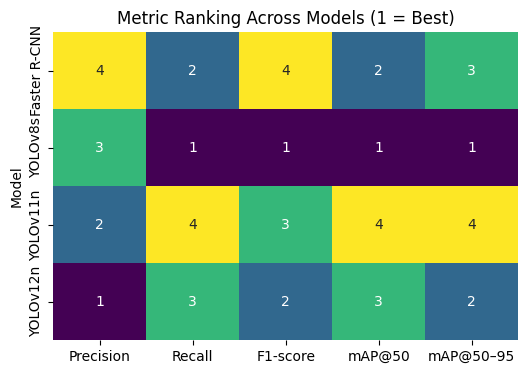

In [8]:
import seaborn as sns

rank_df = results.set_index("Model")[[
    "Precision", "Recall", "F1-score", "mAP@50", "mAP@50–95"
]].rank(ascending=False)

plt.figure(figsize=(6, 4))
sns.heatmap(rank_df, annot=True, cmap="viridis", cbar=False)
plt.title("Metric Ranking Across Models (1 = Best)")
plt.show()

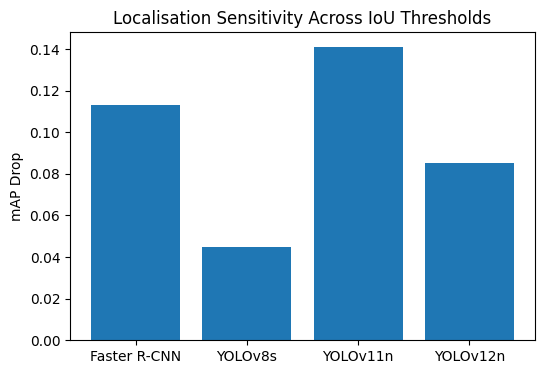

In [9]:
results["mAP Drop"] = results["mAP@50"] - results["mAP@50–95"]

plt.figure(figsize=(6, 4))
plt.bar(results["Model"], results["mAP Drop"])
plt.ylabel("mAP Drop")
plt.title("Localisation Sensitivity Across IoU Thresholds")
plt.show()

## Training vs Validation Loss

Training and validation loss curves are shown below for all object detection models.
These plots are used to analyse convergence behaviour and potential overfitting.

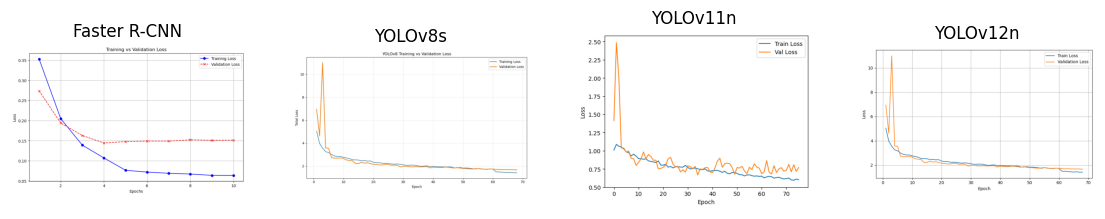

In [14]:
from PIL import Image
import matplotlib.pyplot as plt

loss_images = [
    "D:/CV/Advanced-CV---Group-Assignment/results2a/rcnn_loss.png",
    "D:/CV/Advanced-CV---Group-Assignment/results2a/yolo8s_loss.jpg",
    "D:/CV/Advanced-CV---Group-Assignment/results2a/yolo11n_loss.png",
    "D:/CV/Advanced-CV---Group-Assignment/results2a/yolo12n_loss.png"
]

titles = ["Faster R-CNN", "YOLOv8s", "YOLOv11n", "YOLOv12n"]

plt.figure(figsize=(14, 4))
for i, img in enumerate(loss_images):
    plt.subplot(1, 4, i + 1)
    plt.imshow(Image.open(img))
    plt.axis("off")
    plt.title(titles[i])
plt.show()

### Observations

- All YOLO variants converge rapidly within the early epochs.
- Faster R-CNN exhibits slower convergence due to its two-stage architecture.
- No severe overfitting is observed, as training and validation losses remain closely aligned.

## Confusion Matrices

Confusion matrices are used to evaluate per-class detection performance
and to identify class-level misclassifications.

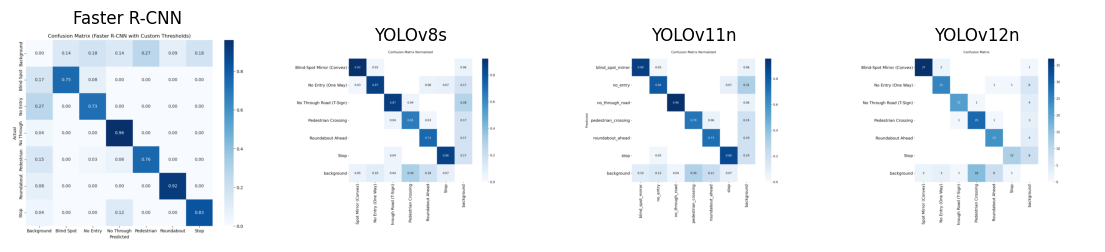

In [15]:
cm_images = [
    "D:/CV/Advanced-CV---Group-Assignment/results2a/rcnn_cm.png",
    "D:/CV/Advanced-CV---Group-Assignment/results2a/yolo8s_cm.png",
    "D:/CV/Advanced-CV---Group-Assignment/results2a/yolo11n_cm.png",
    "D:/CV/Advanced-CV---Group-Assignment/results2a/yolo12n_cm.png"
]

plt.figure(figsize=(14, 4))
for i, img in enumerate(cm_images):
    plt.subplot(1, 4, i + 1)
    plt.imshow(Image.open(img))
    plt.axis("off")
    plt.title(titles[i])
plt.show()

### Observations

- All YOLO models demonstrate strong diagonal dominance, indicating high classification accuracy.
- Misclassifications primarily occur between visually similar traffic sign categories.
- Faster R-CNN shows slightly higher confusion for smaller or distant signs.

## Ground Truth vs Predictions

The following bar charts compare the number of ground truth objects
against the number of predicted detections for each model.
This analysis highlights under-detection and over-detection tendencies.

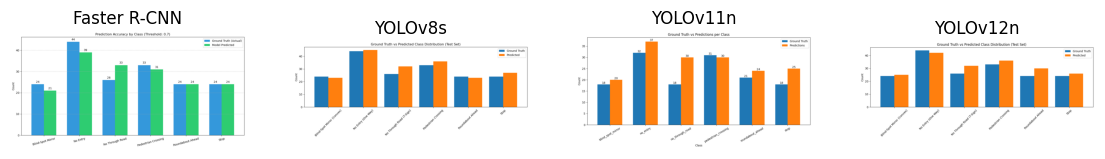

In [16]:
gt_pred_images = [
    "D:/CV/Advanced-CV---Group-Assignment/results2a/rcnn_gt_pred.png",
    "D:/CV/Advanced-CV---Group-Assignment/results2a/yolo8s_gt_pred.png",
    "D:/CV/Advanced-CV---Group-Assignment/results2a/yolo11n_gt_pred.png",
    "D:/CV/Advanced-CV---Group-Assignment/results2a/yolo12n_gt_pred.png"
]

plt.figure(figsize=(14, 4))
for i, img in enumerate(gt_pred_images):
    plt.subplot(1, 4, i + 1)
    plt.imshow(Image.open(img))
    plt.axis("off")
    plt.title(titles[i])
plt.show()

## Object Detection Summary

Overall, YOLO-based models demonstrate superior efficiency and competitive accuracy compared to Faster R-CNN.
Among them, YOLOv8s offers the best balance between detection performance and inference speed,
while YOLOv12n achieves the highest precision.

These results motivate the selection of YOLO architectures for real-time traffic sign detection
in constrained deployment scenarios.

# Results Comparison – Attribute Detection

This section presents a comparative evaluation of the attribute detection models trained in this project.
Each model was trained to classify a different traffic sign attribute, and evaluation is performed using
both quantitative metrics and qualitative visualisations.

## Quantitative Performance Summary

The table below summarises the performance of all attribute detection models evaluated in this project.
Metrics include precision, recall, F1-score, mean Average Precision at IoU 0.5 (mAP@50),
mean Average Precision across IoU thresholds 0.5–0.95 (mAP@50–95),
and average inference time per image.

In [1]:
import pandas as pd

attr_results = pd.DataFrame({
    "Model": ["RF-DETR (Sign Shape)", "EfficientDet (Viewing Angle)",
              "RetinaNet (Mounting Type)", "RTMDet (Sign Condition)"],
    "Precision": [0.137, 0.879, 0.923, 0.287],
    "Recall": [0.713, 0.880, 0.773, 0.504],
    "F1-score": [0.230, 0.880, 0.841, 0.361],
    "mAP@50": [0.450, 0.676, 0.780, 0.247],
    "mAP@50–95": [0.417, 0.516, 0.555, 0.118],
    "Inference (ms)": [13.84, 19.5, 17.56, 40.63]
})

attr_results

,Model,Precision,Recall,F1-score,mAP@50,mAP@50–95,Inference (ms)
0,RF-DETR (Sign Shape),0.137,0.713,0.230,0.450,0.417,13.84
1,EfficientDet (Viewing Angle),0.879,0.880,0.880,0.676,0.516,19.50
2,RetinaNet (Mounting Type),0.923,0.773,0.841,0.780,0.555,17.56
3,RTMDet (Sign Condition),0.287,0.504,0.361,0.247,0.118,40.63


### Metric Interpretation

- **RetinaNet (Mounting Type)** achieves the highest precision and mAP scores, indicating strong localisation
  and classification performance for this attribute.
- **EfficientDet (Viewing Angle)** provides a balanced trade-off between precision and recall,
  resulting in the highest F1-score.
- **RF-DETR (Sign Shape)** exhibits high recall but low precision, suggesting a tendency towards
  over-detection.
- **RTMDet (Sign Condition)** shows lower overall accuracy and higher inference time,
  indicating limited suitability for this attribute under current training conditions.


## Graphs

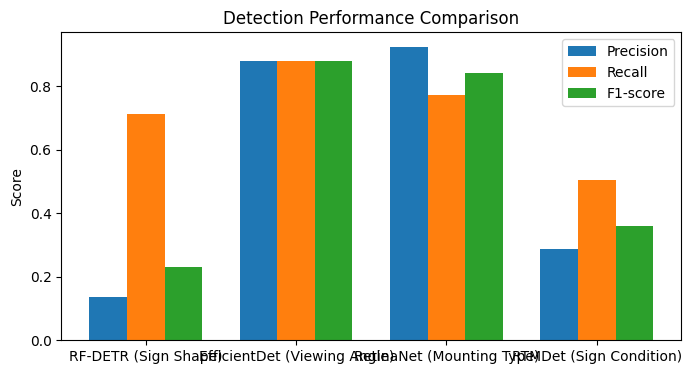

In [3]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ["Precision", "Recall", "F1-score"]
models = attr_results["Model"]

x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(8, 4))
plt.bar(x - width, attr_results["Precision"], width, label="Precision")
plt.bar(x, attr_results["Recall"], width, label="Recall")
plt.bar(x + width, attr_results["F1-score"], width, label="F1-score")

plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Detection Performance Comparison")
plt.legend()
plt.show()

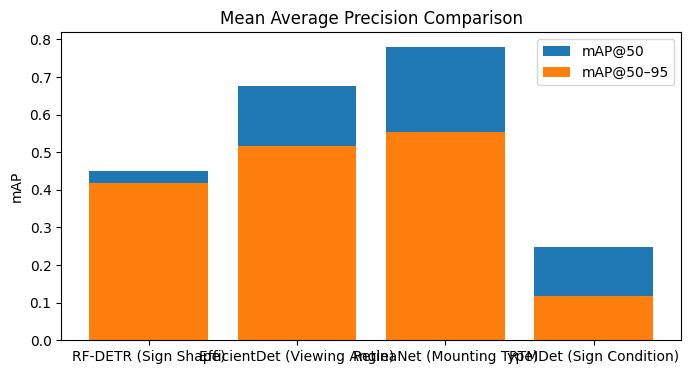

In [4]:
plt.figure(figsize=(8, 4))
plt.bar(models, attr_results["mAP@50"], label="mAP@50")
plt.bar(models, attr_results["mAP@50–95"], bottom=attr_results["mAP@50–95"]*0, label="mAP@50–95")

plt.ylabel("mAP")
plt.title("Mean Average Precision Comparison")
plt.legend()
plt.show()

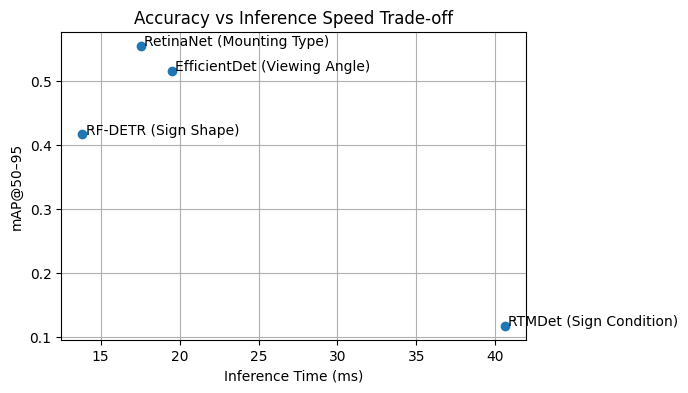

In [5]:
plt.figure(figsize=(6, 4))

plt.scatter(attr_results["Inference (ms)"], attr_results["mAP@50–95"])

for i, model in enumerate(models):
    plt.text(
        attr_results["Inference (ms)"][i] + 0.2,
        attr_results["mAP@50–95"][i],
        model
    )

plt.xlabel("Inference Time (ms)")
plt.ylabel("mAP@50–95")
plt.title("Accuracy vs Inference Speed Trade-off")
plt.grid(True)
plt.show()

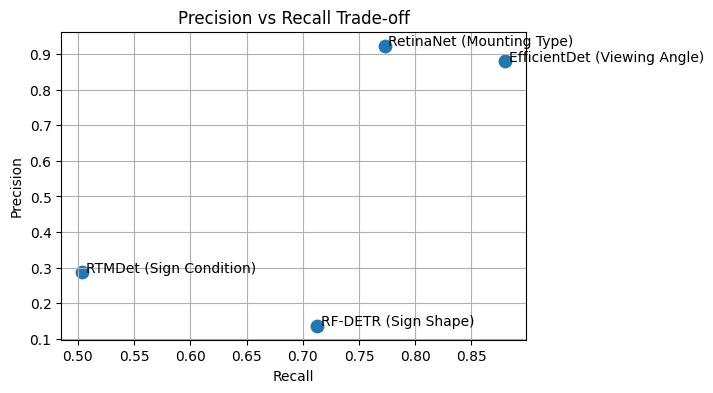

In [6]:
plt.figure(figsize=(6, 4))

plt.scatter(attr_results["Recall"], attr_results["Precision"], s=80)

for i, model in enumerate(attr_results["Model"]):
    plt.text(
        attr_results["Recall"][i] + 0.003,
        attr_results["Precision"][i],
        model
    )

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision vs Recall Trade-off")
plt.grid(True)
plt.show()

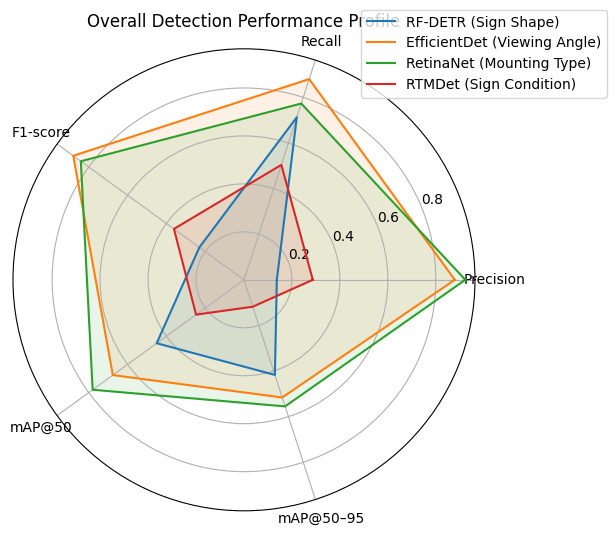

In [8]:
import numpy as np
import matplotlib.pyplot as plt

metrics = ["Precision", "Recall", "F1-score", "mAP@50", "mAP@50–95"]
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)

for _, row in attr_results.iterrows():
    values = row[metrics].tolist()
    values += values[:1]
    ax.plot(angles, values, label=row["Model"])
    ax.fill(angles, values, alpha=0.1)

ax.set_thetagrids(np.degrees(angles[:-1]), metrics)
ax.set_title("Overall Detection Performance Profile")
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.show()

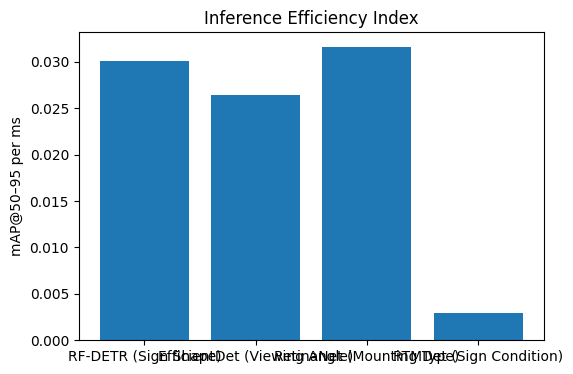

In [9]:
attr_results["Efficiency"] = attr_results["mAP@50–95"] / attr_results["Inference (ms)"]

plt.figure(figsize=(6, 4))
plt.bar(attr_results["Model"], attr_results["Efficiency"])
plt.ylabel("mAP@50–95 per ms")
plt.title("Inference Efficiency Index")
plt.show()

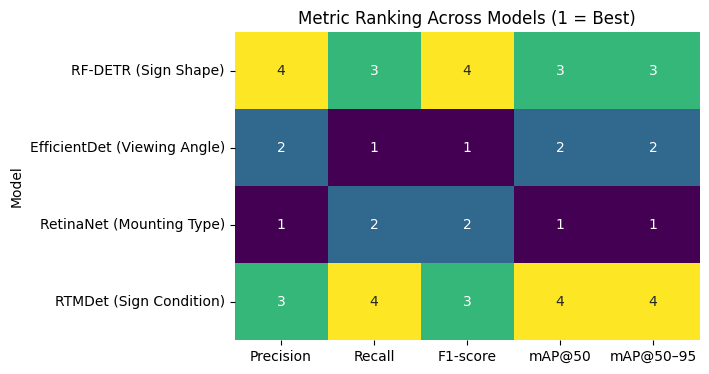

In [10]:
import seaborn as sns

rank_df = attr_results.set_index("Model")[[
    "Precision", "Recall", "F1-score", "mAP@50", "mAP@50–95"
]].rank(ascending=False)

plt.figure(figsize=(6, 4))
sns.heatmap(rank_df, annot=True, cmap="viridis", cbar=False)
plt.title("Metric Ranking Across Models (1 = Best)")
plt.show()

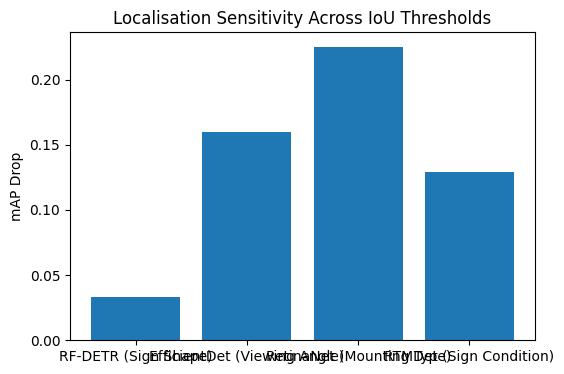

In [11]:
attr_results["mAP Drop"] = attr_results["mAP@50"] - attr_results["mAP@50–95"]

plt.figure(figsize=(6, 4))
plt.bar(attr_results["Model"], attr_results["mAP Drop"])
plt.ylabel("mAP Drop")
plt.title("Localisation Sensitivity Across IoU Thresholds")
plt.show()

## Training vs Validation Loss

The following plots show the training and validation loss curves for each attribute detection model.
These curves are used to analyse convergence behaviour and generalisation.

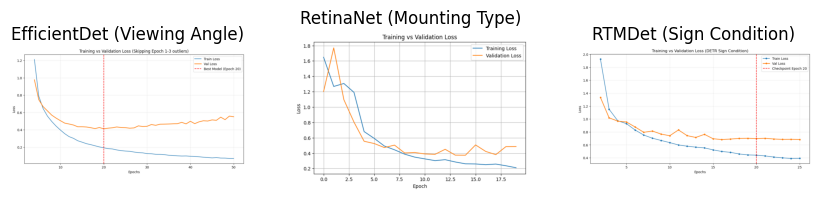

In [18]:
from PIL import Image
import matplotlib.pyplot as plt

loss_images = [
    "D:/CV/Advanced-CV---Group-Assignment/results2b/efficientdet_loss.png",
    "D:/CV/Advanced-CV---Group-Assignment/results2b/retinanet_loss.png",
    "D:/CV/Advanced-CV---Group-Assignment/results2b/rtmdet_loss.png"
]

titles = [
    "EfficientDet (Viewing Angle)",
    "RetinaNet (Mounting Type)",
    "RTMDet (Sign Condition)"
]

plt.figure(figsize=(14, 4))
for i, img in enumerate(loss_images):
    plt.subplot(1, 4, i + 1)
    plt.imshow(Image.open(img))
    plt.axis("off")
    plt.title(titles[i])
plt.show()


### Observations

- All models demonstrate stable convergence without severe overfitting.
- EfficientDet and RetinaNet show smooth validation loss behaviour,
  indicating effective feature learning for their respective attributes.
- RTMDet converges more slowly, consistent with its lower quantitative performance.

## Confusion Matrices

Confusion matrices are presented below to analyse class-level prediction behaviour
for each attribute detection task.

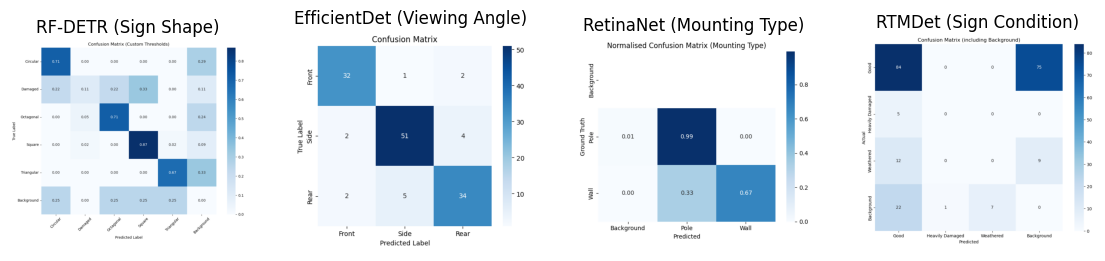

In [25]:
cm_images = [
    "D:/CV/Advanced-CV---Group-Assignment/results2b/rfdetr_cm.png",
    "D:/CV/Advanced-CV---Group-Assignment/results2b/efficientdet_cm.png",
    "D:/CV/Advanced-CV---Group-Assignment/results2b/retinanet_cm.png",
    "D:/CV/Advanced-CV---Group-Assignment/results2b/rtmdet_cm.png"
]
titles = [
    "RF-DETR (Sign Shape)",
    "EfficientDet (Viewing Angle)",
    "RetinaNet (Mounting Type)",
    "RTMDet (Sign Condition)"
]

plt.figure(figsize=(14, 4))

for i, (img, title) in enumerate(zip(cm_images, titles)):
    plt.subplot(1, 4, i + 1)
    plt.imshow(Image.open(img))
    plt.axis("off")
    plt.title(title)

plt.show()


### Observations

- RetinaNet demonstrates strong diagonal dominance, indicating reliable attribute classification.
- EfficientDet shows consistent performance across viewing angle classes.
- RF-DETR and RTMDet exhibit increased confusion between visually similar attribute categories,
  particularly under challenging conditions.

## Ground Truth vs Predictions

The following bar charts compare the number of ground truth labels
against predicted attribute labels for each model.
This analysis highlights over- and under-prediction tendencies.

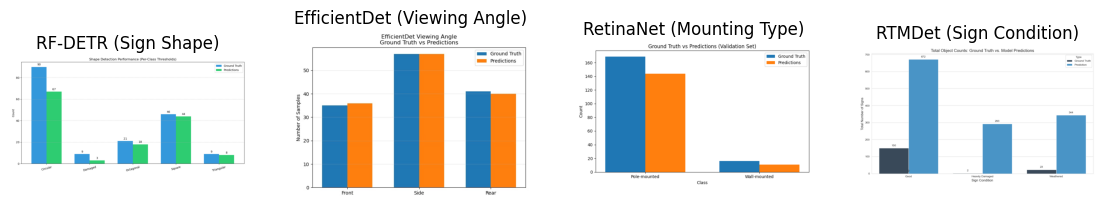

In [27]:
gt_pred_images = [
    "D:/CV/Advanced-CV---Group-Assignment/results2b/rfdetr_gt_pred.png",
    "D:/CV/Advanced-CV---Group-Assignment/results2b/efficientdet_gt_pred.jpg",
    "D:/CV/Advanced-CV---Group-Assignment/results2b/retinanet_gt_pred.png",
    "D:/CV/Advanced-CV---Group-Assignment/results2b/rtmdet_gt_pred.png"
]

plt.figure(figsize=(14, 4))
for i, img in enumerate(gt_pred_images):
    plt.subplot(1, 4, i + 1)
    plt.imshow(Image.open(img))
    plt.axis("off")
    plt.title(titles[i])
plt.show()

## Attribute Detection Summary

Overall, **RetinaNet** and **EfficientDet** demonstrate superior performance for attribute classification,
achieving higher accuracy and more stable generalisation compared to RF-DETR and RTMDet.

The results indicate that model–attribute alignment plays a critical role in performance,
with different architectures exhibiting strengths depending on the complexity and visual distinctiveness
of the attribute being classified.